<a href="https://colab.research.google.com/github/farz1313/Farz-Projects/blob/main/Farz_WiDS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library

# Load sklearn libraries for machine learning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Load plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# This is how you can install any non-standard libraries if needed
!pip install pandas_profiling

# Load the installed library
import pandas_profiling

In [2]:
df = pd.read_csv("TrainingWiDS2021.csv.zip", index_col=0)

In [3]:
df['ethnicity'] = np.where(df['ethnicity'] == "African American", 1, np.where(df['ethnicity'] == "Asian", 2, np.where(df['ethnicity'] == "Caucasian", 3, 
                                np.where(df['ethnicity'] == "Hispanic", 4, np.where(df['ethnicity'] == "Native American", 5, np.where(df['ethnicity'] == "Other/Unknown", 6, np.nan))))))
# The dataset contains 13057 data points with missing values and 181 features(floats(157), integers(15) and object(7))
print(df.columns)  

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=180)


In [4]:
df = df.drop(["h1_bilirubin_max", "h1_bilirubin_min", "h1_albumin_max", "h1_albumin_min", "h1_lactate_max", "h1_lactate_min", "h1_pao2fio2ratio_max", 
                            "h1_pao2fio2ratio_min", "h1_arterial_ph_max", "h1_arterial_pco2_max", "h1_arterial_pco2_min", "h1_arterial_po2_max", "h1_arterial_po2_min", 
                            "h1_hco3_max", "h1_hco3_min", "h1_wbc_max", "h1_wbc_min", "h1_calcium_max", "h1_calcium_min", "h1_platelets_max", "h1_platelets_min", 
                            "h1_bun_max", "h1_bun_min", "h1_diasbp_invasive_max", "h1_diasbp_invasive_min", "h1_sysbp_invasive_max", "h1_sysbp_invasive_min",
                           "h1_creatinine_max", "h1_creatinine_min", "h1_mbp_invasive_max", "h1_mbp_invasive_min", "h1_arterial_ph_min"], axis = 1)
print(df.columns)

Index(['encounter_id', 'hospital_id', 'age', 'bmi', 'elective_surgery',
       'ethnicity', 'gender', 'height', 'hospital_admit_source',
       'icu_admit_source',
       ...
       'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'aids', 'cirrhosis',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'diabetes_mellitus'],
      dtype='object', length=148)


In [5]:
#Data Pre-processing:

In [6]:
# Subset only the numerical data
df = df.select_dtypes(np.number)
df.info()

# Remove data with id names
df = df.drop(['encounter_id', 'hospital_id', 'icu_id'], axis = 1)

# Convert any values into float, easy to use for predictive models
df = df.apply (pd.to_numeric, errors='coerce')
df = df.astype(float)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130157 entries, 1 to 130157
Columns: 143 entries, encounter_id to diabetes_mellitus
dtypes: float64(126), int64(17)
memory usage: 143.0 MB


In [7]:
print(df.dtypes)

age                            float64
bmi                            float64
elective_surgery               float64
ethnicity                      float64
height                         float64
                                ...   
immunosuppression              float64
leukemia                       float64
lymphoma                       float64
solid_tumor_with_metastasis    float64
diabetes_mellitus              float64
Length: 140, dtype: object


In [8]:
df.head()

,age,bmi,elective_surgery,ethnicity,height,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,...,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus
1,68.0,22.732803,0.0,3.0,180.3,0.541667,0.0,73.9,2.3,113.0,502.01,0.0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,...,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,77.0,27.421875,0.0,3.0,160.0,0.927778,0.0,70.2,NaN,108.0,203.01,0.0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,...,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,145.0,143.0,11.3,11.3,36.9,36.9,1.3,1.3,4.2,4.2,145.0,145.0,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25.0,31.952749,0.0,3.0,172.7,0.000694,0.0,95.3,NaN,122.0,703.03,0.0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,81.0,22.635548,1.0,3.0,165.1,0.000694,0.0,61.7,NaN,203.0,1206.03,1.0,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1.0,8.0,62.0,30.0,48.0,42.0,...,1.6,1.1,NaN,NaN,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,NaN,NaN,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,NaN,NaN,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,19.0,NaN,0.0,3.0,188.0,0.073611,0.0,NaN,NaN,119.0,601.01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,99.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import matplotlib.pyplot as plt # Visualization
%matplotlib inline

In [10]:
print(df.describe())

                 age  ...  diabetes_mellitus
count  125169.000000  ...      130157.000000
mean       61.995103  ...           0.216285
std        16.822880  ...           0.411712
min         0.000000  ...           0.000000
25%        52.000000  ...           0.000000
50%        64.000000  ...           0.000000
75%        75.000000  ...           0.000000
max        89.000000  ...           1.000000

[8 rows x 140 columns]


In [11]:
#Feature engineering and selection

In [12]:
df['bmi_calculated'] = 10000 * df['weight']/(df['height']**2)
# Create another feature measuring fluctuation in glucose
df['d1_glucose_diff'] = df['d1_glucose_max'] - df['d1_glucose_min']

In [13]:
# Inspect your DataFrame, are there any covariates that are irrelevant for prediction? Drop unimportant covariates.
df = df.drop([ 'bmi'], axis=1)

In [14]:
##One-hot encode categorical variables

In [15]:
df = pd.get_dummies(df)

In [16]:
df.head()

,age,elective_surgery,ethnicity,height,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,...,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,bmi_calculated,d1_glucose_diff
1,68.0,0.0,3.0,180.3,0.541667,0.0,73.9,2.3,113.0,502.01,0.0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,...,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.732803,59.0
2,77.0,0.0,3.0,160.0,0.927778,0.0,70.2,NaN,108.0,203.01,0.0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,95.0,...,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.3,12.7,145.0,143.0,11.3,11.3,36.9,36.9,1.3,1.3,4.2,4.2,145.0,145.0,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.421875,17.0
3,25.0,0.0,3.0,172.7,0.000694,0.0,95.3,NaN,122.0,703.03,0.0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.952749,NaN
4,81.0,1.0,3.0,165.1,0.000694,0.0,61.7,NaN,203.0,1206.03,1.0,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1.0,8.0,62.0,30.0,48.0,42.0,48.0,...,NaN,NaN,198.0,43.0,5.0,3.5,NaN,NaN,9.0,8.0,NaN,NaN,11.6,11.6,34.0,34.0,1.6,1.1,NaN,NaN,NaN,NaN,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.635548,97.0
5,19.0,0.0,3.0,188.0,0.073611,0.0,NaN,NaN,119.0,601.01,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,99.0,57.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [17]:
#Scale the data

In [18]:
scalar = MinMaxScaler()

# Step 2: fit the MinMaxScaler using our data 
# Hint: use .fit()
values = df.values
scalar.fit(values)

# Step 3: scale the values in our dataset
# Hint: use .transform()
values_scaled = scalar.transform(values)
df = pd.DataFrame(values_scaled, columns=df.columns, index=df.index)

In [19]:
##Impute missing values

In [20]:
# Step 1: define a simple imputer, which replaces missing values using the median, using SimpleImputer class
# Hint: look up the documentation for SimpleImputer
imputer = SimpleImputer(strategy = "median")

# Step 2: impute the missing data
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

In [21]:
df.head(10)

,age,elective_surgery,ethnicity,height,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,...,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,bmi_calculated,d1_glucose_diff
1,0.764045,0.0,0.4,0.738140,0.004501,0.0,0.239484,0.323529,0.057971,0.228074,0.0,0.0,0.004992,0.219512,0.203125,0.367089,0.666667,1.0,0.0,0.75,0.230481,0.594595,0.318182,0.0,0.00000,0.285714,0.285714,0.156317,0.634607,0.571429,0.414634,0.947368,0.166919,0.0,0.293987,0.062500,0.321429,0.184874,0.311688,0.184874,...,0.046392,0.040816,0.369176,0.397940,0.285714,0.294118,0.371429,0.472222,0.287433,0.330017,0.127349,0.146497,0.495935,0.495935,0.495798,0.494444,0.058343,0.057394,0.340426,0.347826,0.581395,0.558140,0.264579,0.311215,0.593438,0.673794,0.175346,0.135427,0.282306,0.297416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.139857,0.176190
2,0.865169,0.0,0.4,0.390478,0.006697,0.0,0.214383,0.500000,0.033816,0.092229,0.0,0.0,0.009983,0.040650,0.023897,1.000000,0.000000,0.4,0.0,0.00,0.189387,0.608108,0.588068,0.0,0.03750,0.246753,0.246753,0.042827,0.777587,0.517857,0.682927,0.394737,0.166919,1.0,0.262806,0.270833,0.488095,0.411765,0.233766,0.411765,...,0.159794,0.210884,0.949821,0.869271,0.333333,0.411765,0.628571,0.777778,0.492424,0.295015,0.135211,0.160828,0.504065,0.512195,0.585434,0.594444,0.058343,0.076526,0.361702,0.369565,0.720930,0.720930,0.200864,0.311215,0.699498,0.838499,0.023911,0.054646,0.000000,0.026398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.192872,0.109524
3,0.280899,0.0,0.4,0.607981,0.001425,0.0,0.384668,0.500000,0.101449,0.319404,0.0,0.0,0.009983,0.121951,0.061581,0.367089,0.666667,1.0,0.0,1.00,0.167947,0.486486,0.480114,0.0,0.17500,0.285714,0.285714,0.156317,0.634607,0.589286,0.512195,0.605263,0.166919,0.0,0.213140,0.270833,0.488095,0.352941,0.454545,0.352941,...,0.077320,0.074830,0.299283,0.308870,0.333333,0.441176,0.457143,0.583333,0.220588,0.230012,0.127349,0.146497,0.495935,0.495935,0.495798,0.494444,0.058343,0.057394,0.340426,0.347826,0.581395,0.558140,0.264579,0.311215,0.593438,0.673794,0.175346,0.135427,0.282306,0.297416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.244098,0.138095
4,0.910112,1.0,0.4,0.477822,0.001425,0.0,0.156716,0.500000,0.492754,0.547932,1.0,0.0,0.009983,0.121951,0.061581,0.493671,1.000000,1.0,0.0,1.00,0.260854,0.567568,0.275568,1.0,0.12500,0.155844,0.155844,0.237687,0.682267,0.000000,0.512195,0.355263,0.166919,1.0,0.158129,0.173611,0.297619,0.016807,0.376623,0.016807,...,0.077320,0.074830,0.306452,0.045370,0.523810,0.323529,0.457143,0.583333,0.173797,0.177509,0.127349,0.146497,0.528455,0.536585,0.504202,0.513889,0.102100,0.038263,0.340426,0.347826,0.581395,0.558140,0.200864,0.170394,0.681821,0.673794,0.593785,0.175817,0.368844,0.353145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138758,0.236508
5,0.213483,0.0,0.4,0.870012,0.001840,0.0,0.280868,0.500000,0.086957,0.273053,0.0,0.0,0.009983,0.121951,0.061581,0.367089,1.000000,1.0,0.0,1.00,0.167947,0.202703,0.480114,0.0,0.39375,0.285714,0

In [22]:
pip install dabl

In [23]:

from pandas_profiling import ProfileReport

In [24]:
pip install delayed

In [25]:
import dabl

In [26]:
df_dabl=dabl.clean(df)

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:547: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like classification
Showing only top 10 of 126 continuous features


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 345 outliers in column h1_glucose_max.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 124 outliers in column h1_glucose_min.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 90 outliers in column bmi_calculated.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.636


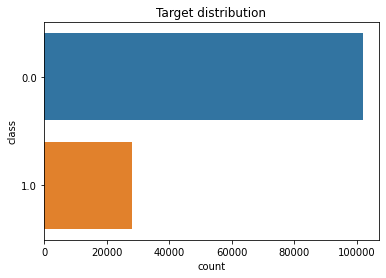

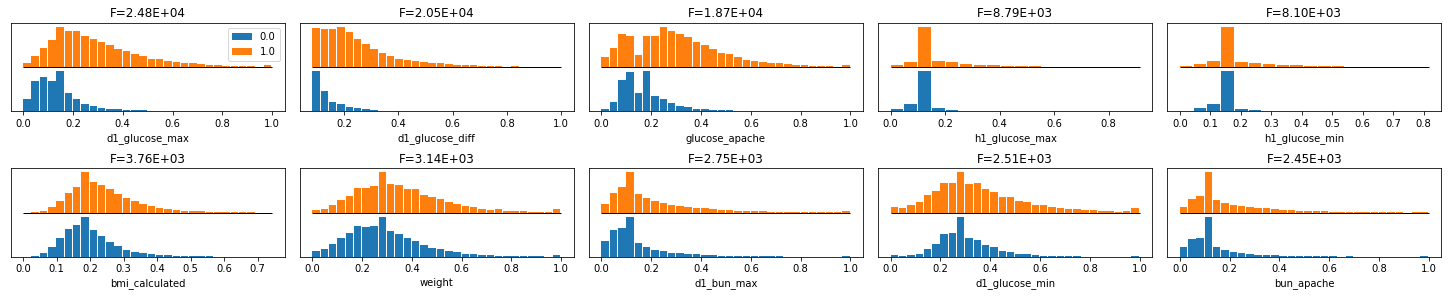

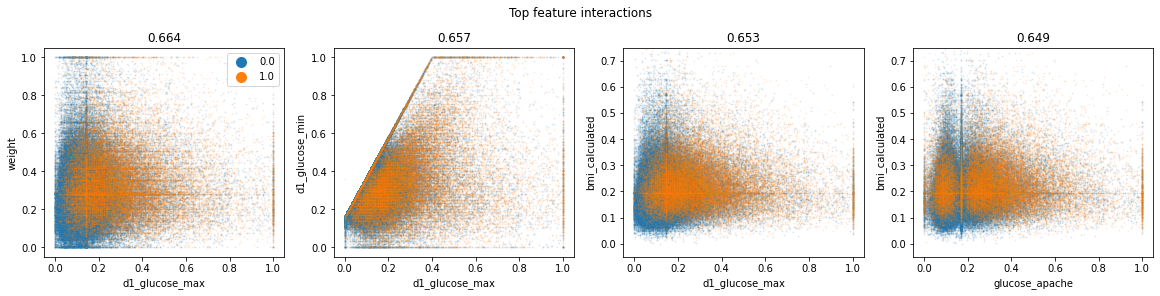

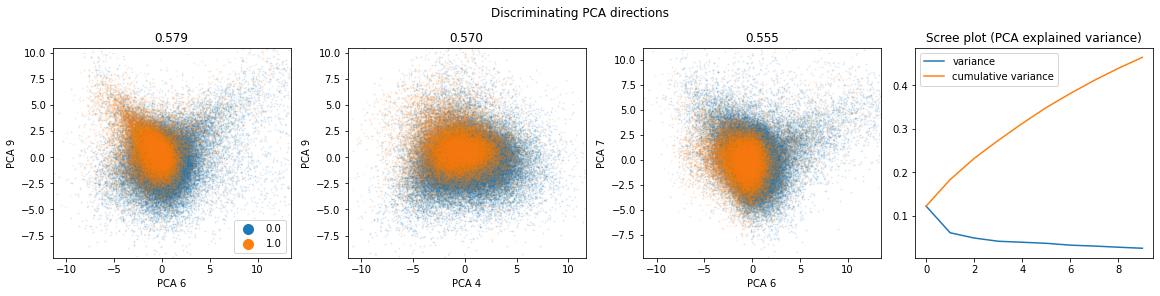

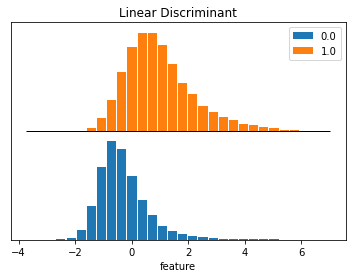

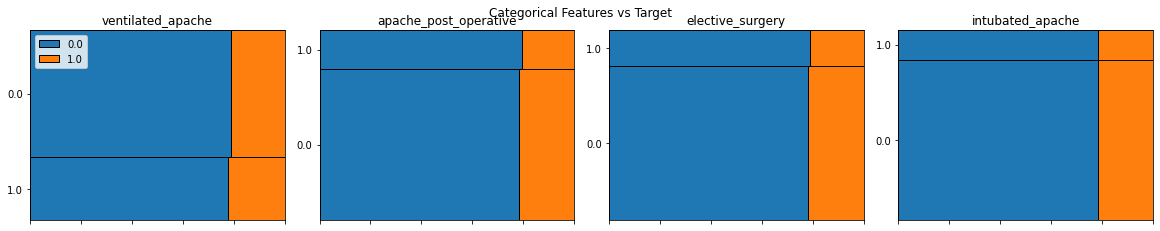

In [27]:
dabl.plot(df_dabl, "diabetes_mellitus")

In [28]:
ec=dabl.SimpleClassifier(random_state=0).fit(df_dabl, target_col="diabetes_mellitus")

Running DummyClassifier()
accuracy: 0.784 average_precision: 0.216 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.439
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.784 average_precision: 0.216 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.439

Running GaussianNB()
accuracy: 0.763 average_precision: 0.430 roc_auc: 0.758 recall_macro: 0.656 f1_macro: 0.654
=== new best GaussianNB() (using recall_macro):
accuracy: 0.763 average_precision: 0.430 roc_auc: 0.758 recall_macro: 0.656 f1_macro: 0.654

Running MultinomialNB()
accuracy: 0.787 average_precision: 0.447 roc_auc: 0.769 recall_macro: 0.520 f1_macro: 0.485
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.729 average_precision: 0.365 roc_auc: 0.724 recall_macro: 0.724 f1_macro: 0.671
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.729 average_precision: 0.365 roc_auc: 0.724 recall_macro: 0.724 f1_macro: 0.671

Running Decision

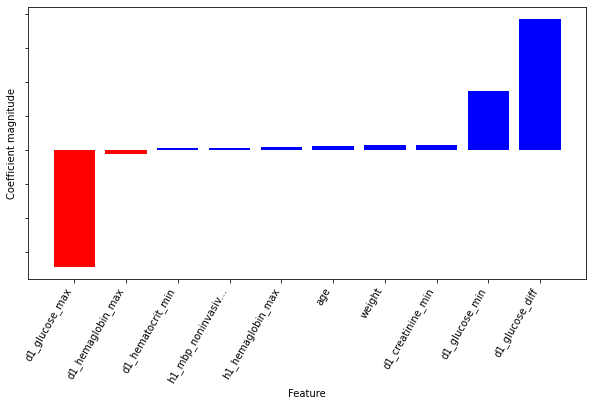

In [29]:
dabl.explain(ec) 

In [30]:
!pip install pycaret

  Using cached https://files.pythonhosted.org/packages/f4/cb/64623369f348e9bfb29ff898a57ac7c91ed4921f228e9726546614d63ccb/scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl
ERROR: imbalanced-learn 0.8.0 has requirement scikit-learn>=0.24, but you'll have scikit-learn 0.23.2 which is incompatible.
ERROR: dabl 0.2.0 has requirement scikit-learn>=0.24.0, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [31]:
import pycaret

In [32]:
from pycaret.classification import setup

In [33]:
trial=setup(data=df_dabl,target='diabetes_mellitus')

,Description,Value
0,session_id,3990
1,Target,diabetes_mellitus
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(130157, 131)"
5,Missing Values,False
6,Numeric Features,126
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: ignored

In [34]:
best_model=pycaret.classification.compare_models()

""


In [35]:
xgboost=pycaret.classification.create_model('xgboost')

ValueError: ignored

In [ ]:
## train test data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dabl.loc[:, df_dabl.columns != 'diabetes_mellitus'], df_dabl['diabetes_mellitus'], stratify=df_dabl['diabetes_mellitus'], random_state=66)

In [ ]:
##Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.741


In [38]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.808


In [ ]:
#Feature Importance in Decision Trees

In [39]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03096614 0.01379543
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.81353219 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

ValueError: ignored

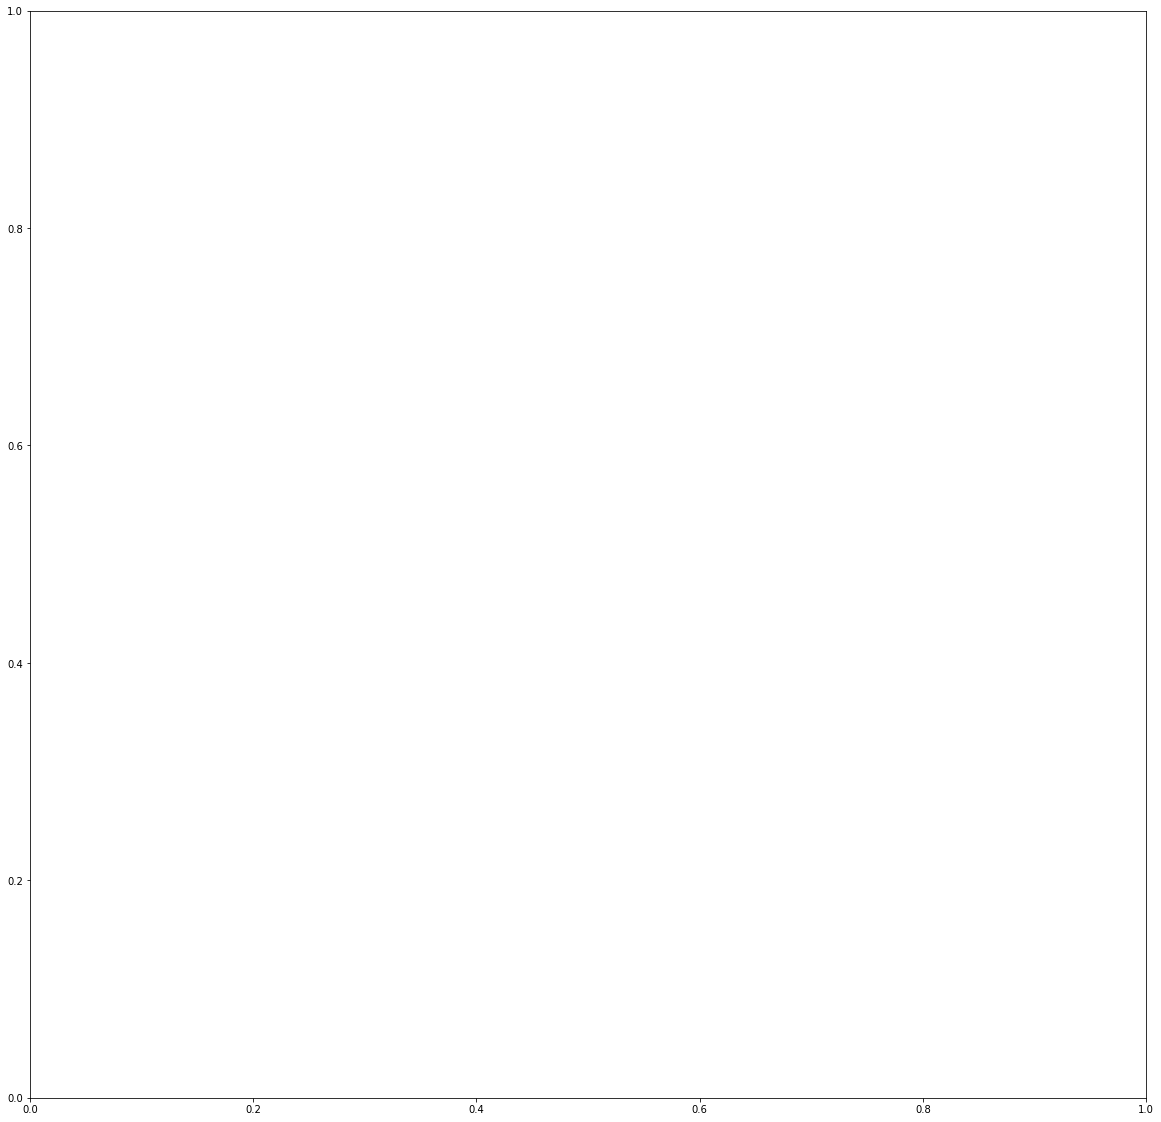

In [40]:
diabetes_features = [x for i,x in enumerate(df_dabl.columns) if i!=139]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(20,20))
    n_features = 139
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)

In [42]:
##K-Nearest Neighbors to Predict Diabetes

In [43]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

KeyboardInterrupt: ignored

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))